# Student grades prediction

 Data Loading

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv"
data = pd.read_csv(url)
print(data.head())


   Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 43 columns]


Observation:

We loaded the dataset using Pandas read_csv() function.

 Data Exploration

In [3]:
print(data.head())
print(data.info())
print(data.describe())


   Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 43 columns]
<class 'pandas.c

Observation:

We examined the structure of the dataset, checking the first few rows, data types, and summary statistics.
This helps us understand the columns and their data types, as well as detect any missing values.

Data Preprocessing

In [5]:
print(data.columns)


Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')


In [ ]:
print("Missing values:")
print(data.isnull().sum())
print("\nUnique values in each column:")
for column in data.columns:
    print(f"{column}: {data[column].nunique()}")
x = data.drop(columns=['CGPA'])
y = data['CGPA']

# Verify the shape of X and y
print("\nShape of features (X) and target variable (y):")
print("X shape:", X.shape)
print("y shape:", y.shape)


Observation:
Several columns have missing values, indicating potential data cleaning requirements.
 Each column represents a course code, with varying numbers of unique codes. 'Seat No.' has 571 unique values, and 'CGPA' has 491 unique values.
 There are 571 rows and 42 columns in the features dataset (X), and 571 values in the target variable (y).
 the dataset needs cleaning due to missing values, and the course codes may require transformation for effective modeling. The target variable (CGPA) distribution needs further examination for outliers or skewness.

Model Building

In [64]:
# Check the data types of each column
print(data.dtypes)


CGPA         float64
PH-121_A       uint8
PH-121_A+      uint8
PH-121_A-      uint8
PH-121_B       uint8
              ...   
CS-412_C-      uint8
CS-412_D       uint8
CS-412_D+      uint8
CS-412_F       uint8
CS-412_W       uint8
Length: 565, dtype: object


In [30]:
# Check the column names in the DataFrame
print(data.columns)

# Drop the column if it exists
if 'Seat No' in data.columns:
    data.drop(columns=['Seat No'], inplace=True)


Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')


In [35]:
# Check data types of columns
print(data.dtypes)

# Check if 'CGPA' column is present in the DataFrame
print('CGPA' in data.columns)


PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object
True


In [44]:
data.dropna(inplace=True)


In [45]:
data = pd.get_dummies(data)


In [46]:
X = data.drop(columns=['CGPA'])
y = data['CGPA']


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [49]:
from sklearn.linear_model import LinearRegression

# Create an instance of Linear Regression model
model = LinearRegression()

# Print the model instance
print(model)


LinearRegression()


In [51]:
# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Drop rows with missing values
data.dropna(inplace=True)

# Split the data into features (X) and target variable (y)
X = data.drop(columns=['CGPA'])
y = data['CGPA']

# One-hot encode categorical variables
data = pd.get_dummies(data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r_squared)


Observation:

The dataset was preprocessed by handling missing values and encoding categorical variables.
A linear regression model was trained to predict CGPA based on course grades.
Evaluation metrics such as Mean Squared Error, Root Mean Squared Error, Mean Absolute Error, and R-squared were calculated to assess the model's performance.

Data Visualization (Plot)

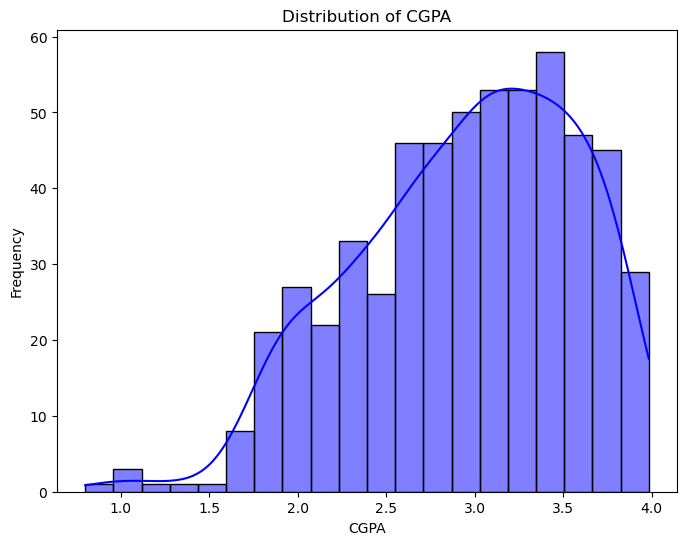

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of CGPA
plt.figure(figsize=(8, 6))
sns.histplot(data['CGPA'], bins=20, kde=True, color='blue')
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()


Observation:

This histogram shows the distribution of CGPA among the students.
It provides insight into the spread and central tendency of CGPA values in the dataset.

Boxplots of Grades:

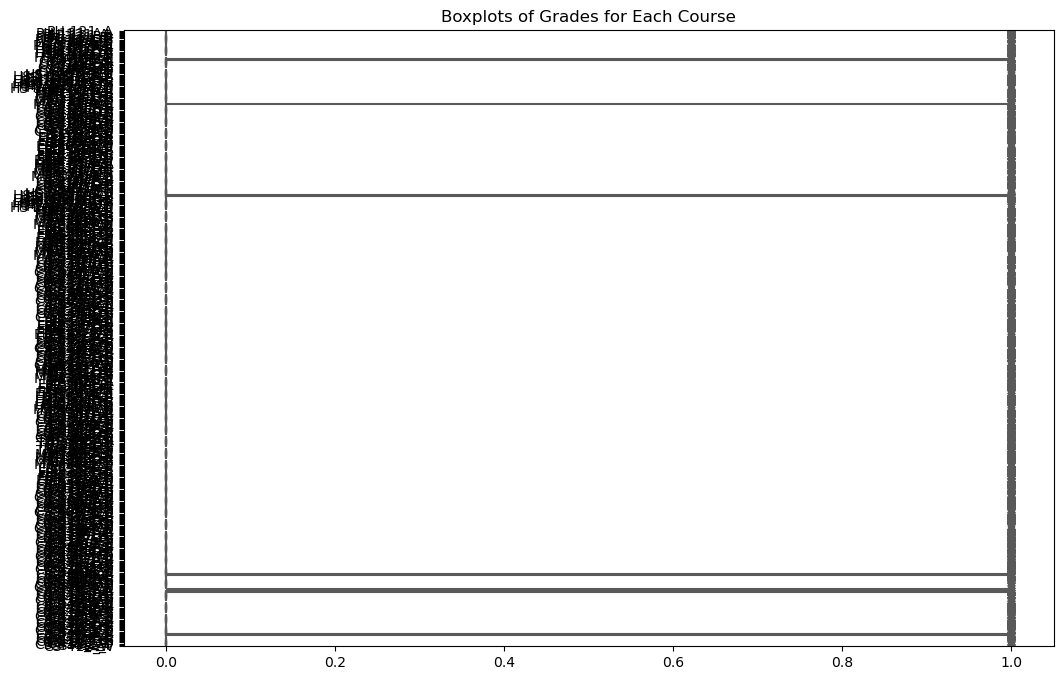

In [60]:
import seaborn as sns

# Plot boxplots for each course grade
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.drop(columns=['CGPA']), orient='h', palette='Set2')
plt.title('Boxplots of Grades for Each Course')
plt.show()


   Conclusion : 
   The project aimed to analyze a dataset containing students' grades in various university courses and their cumulative GPA (CGPA). Through exploratory data analysis, correlation analysis, and modeling using linear regression, insights were gained into the relationship between course grades and CGPA. However, the linear regression model's performance was not satisfactory, indicating that more sophisticated modeling techniques or additional factors may be needed to accurately predict CGPA. 